# Introduction

*Air pollution is a critical environmental issue that affects the health and well-being of millions of people worldwide. Understanding and predicting air quality levels can help mitigate the harmful effects of pollution and improve public health measures. This project aims to develop a predictive model for Air Quality Index (AQI) using various machine learning algorithms.*

# Dataset
*The dataset used in this project is the **"city_day.csv"** file, which contains daily air quality data for various cities. The dataset includes features such as date, city, and various pollutant levels (e.g., PM2.5, PM10, NO2, CO, O3). The target variable is the AQI, which indicates the overall air quality.*
## ***Source:[Link](https://www.kaggle.com/)***

## Methodology

### Data Exploration and Cleaning:
- Load the dataset and inspect its structure.
- Handle missing values by dropping incomplete rows.
- Convert categorical features to numerical using one-hot encoding.

### Feature Selection and Scaling:
- Identify the relevant features for AQI prediction.
- Split the data into training and testing sets.
- Apply standard scaling to normalize the feature values.

### Model Selection and Training:
- Implement multiple regression models: Linear Regression, Support Vector Regression (SVR), Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.
- Train each model using the training dataset and evaluate their performance.

### Model Evaluation:
- Calculate evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score for each model.
- Compare the performance of different models to select the best one.

### Model Analysis and Visualization:
- Plot evaluation metrics to visualize model performance.
- Generate prediction vs. true values plots to assess prediction accuracy.
- Create residuals plots to examine the distribution of errors.


In [1]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Step 2: Load Dataset
dataset = pd.read_csv('city_day.csv')
print(dataset.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [3]:
# Step 3: EDA/Cleaning the data
# Drop any rows with missing values
dataset.dropna(inplace=True)
# Convert categorical features to numerical using one-hot encoding
dataset = pd.get_dummies(dataset)
# Show basic statistics of the dataset
print(dataset.describe())

             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0

In [4]:
# Step 4: Split the data into Training-Testing Data
X = dataset.drop('AQI', axis=1)  # Features
y = dataset['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Step 6: Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


In [7]:
# Step 7: Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    }


In [8]:
# Step 7: StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Step 8: Print Results
for name, metrics in results.items():
    print(f'\nModel: {name}')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')


Model: Linear Regression
Mean Squared Error: 388.3260162995708
Mean Absolute Error: 14.811662932750847
R^2 Score: 0.9533273806214848

Model: Support Vector Regression
Mean Squared Error: 8394.87230406647
Mean Absolute Error: 59.78888589621409
R^2 Score: -0.008973551431264548

Model: Decision Tree Regressor
Mean Squared Error: 381.15865384615387
Mean Absolute Error: 13.778846153846153
R^2 Score: 0.9541888206633442

Model: Random Forest Regressor
Mean Squared Error: 224.43202059294876
Mean Absolute Error: 10.683549679487179
R^2 Score: 0.9730256798828408

Model: Gradient Boosting Regressor
Mean Squared Error: 261.0844220688646
Mean Absolute Error: 11.959481841335336
R^2 Score: 0.9686204546041043


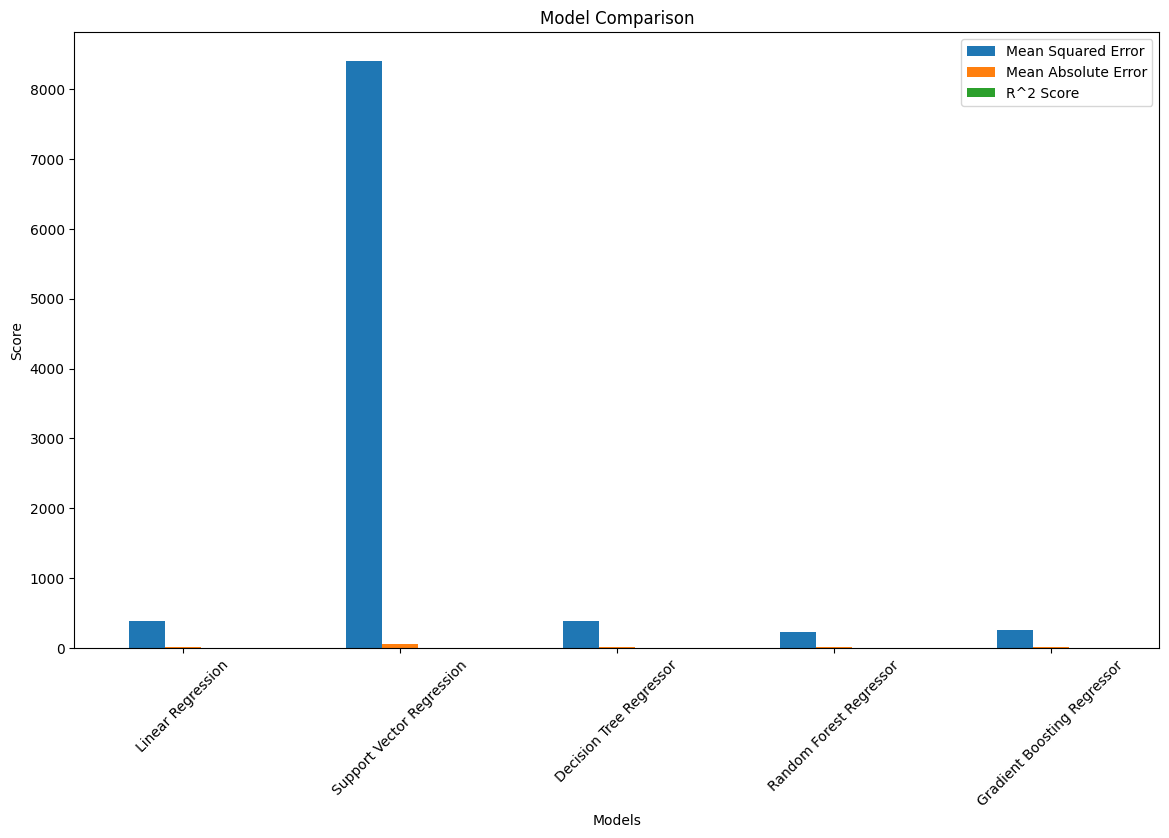

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 9: Plot Evaluation Metrics
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


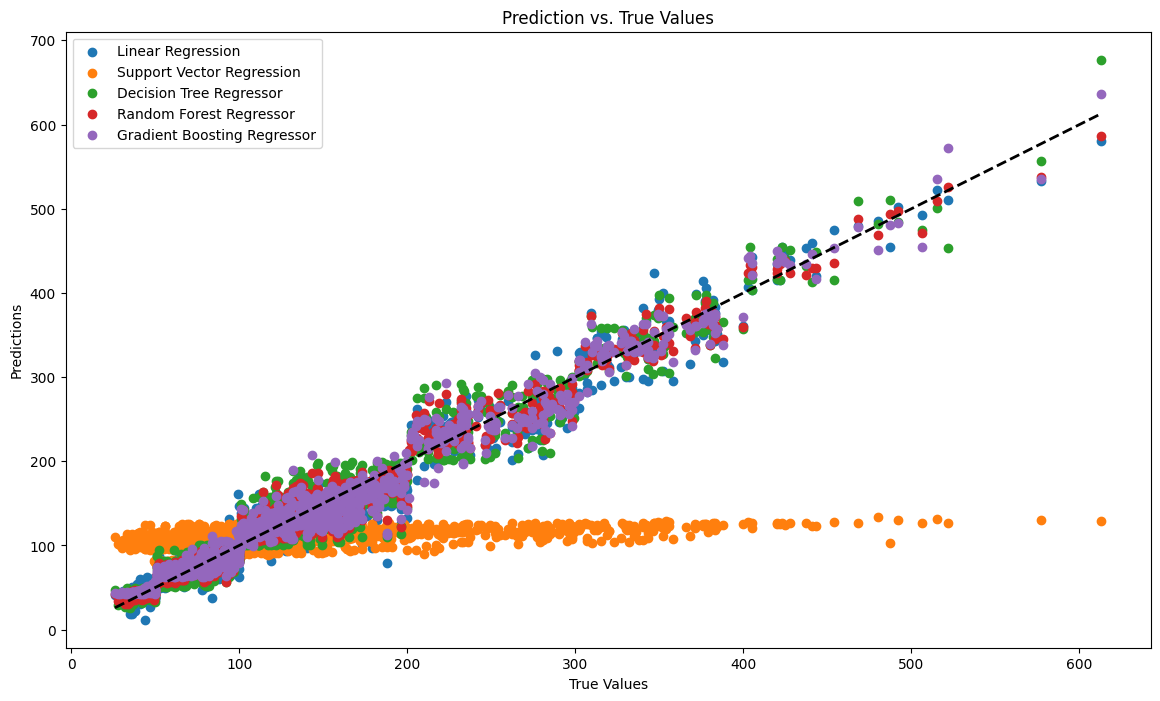

In [11]:
# Step 10: Plot Prediction vs. True Values
plt.figure(figsize=(14, 8))
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    plt.scatter(y_test, predictions, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Prediction vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend(loc='best')
plt.show()

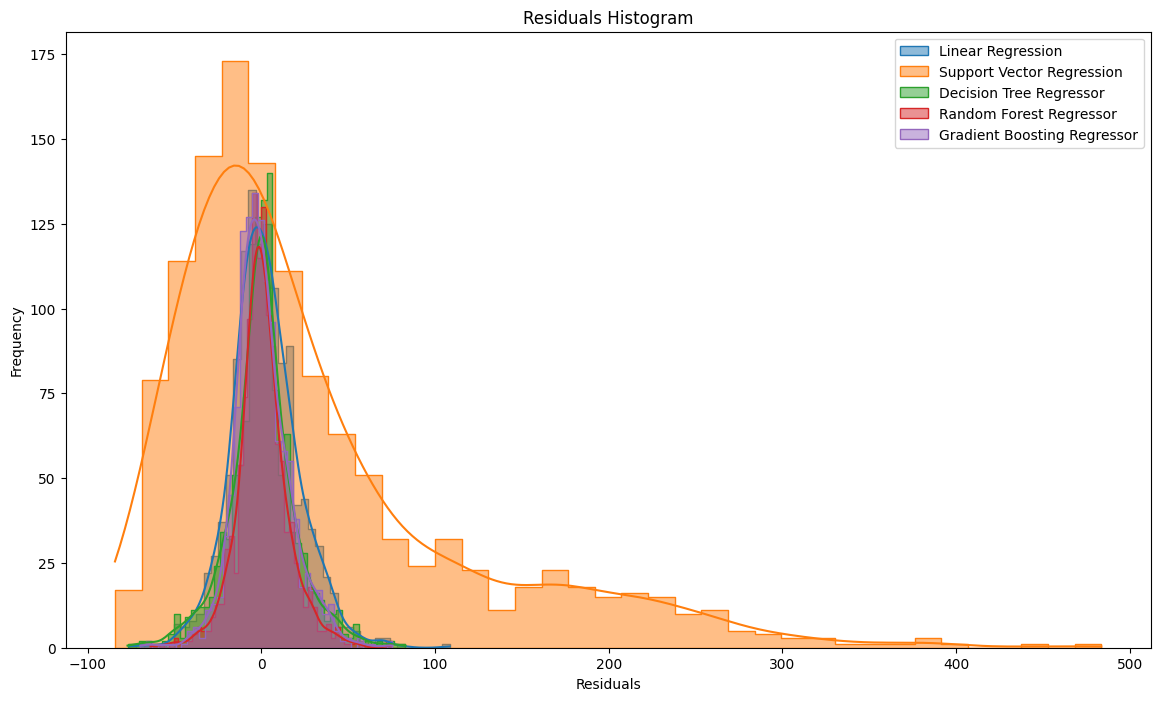

In [12]:
# Step 11: Plot Residuals
plt.figure(figsize=(14, 8))
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    residuals = y_test - predictions
    sns.histplot(residuals, kde=True, label=name, element='step')

plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()


# Conclusion
## *By exploring various regression models and comparing their performance, this project aims to identify the most accurate model for predicting AQI. The selected model can then be used to forecast air quality levels, enabling timely interventions and contributing to better environmental and public health management.*